In [2]:
words = open('names.txt', 'r').read().splitlines()

In [3]:
words[0:10]

['emma',
 'olivia',
 'ava',
 'isabella',
 'sophia',
 'charlotte',
 'mia',
 'amelia',
 'harper',
 'evelyn']

In [4]:
len(words)

32033

In [5]:
min(len(w) for w in words)

2

In [6]:
max(len(w) for w in words)

15

In [29]:
b = {}
for w in words:
    chs = ['<S>'] + list(w) + ['<E>']
    for ch1, ch2 in zip(chs, chs[1:]):
        bigram = (ch1, ch2)
        b[bigram] = b.get(bigram, 0) + 1

In [34]:
sorted(b.items(), key = lambda kv: -kv[1])

[(('n', '<E>'), 6763),
 (('a', '<E>'), 6640),
 (('a', 'n'), 5438),
 (('<S>', 'a'), 4410),
 (('e', '<E>'), 3983),
 (('a', 'r'), 3264),
 (('e', 'l'), 3248),
 (('r', 'i'), 3033),
 (('n', 'a'), 2977),
 (('<S>', 'k'), 2963),
 (('l', 'e'), 2921),
 (('e', 'n'), 2675),
 (('l', 'a'), 2623),
 (('m', 'a'), 2590),
 (('<S>', 'm'), 2538),
 (('a', 'l'), 2528),
 (('i', '<E>'), 2489),
 (('l', 'i'), 2480),
 (('i', 'a'), 2445),
 (('<S>', 'j'), 2422),
 (('o', 'n'), 2411),
 (('h', '<E>'), 2409),
 (('r', 'a'), 2356),
 (('a', 'h'), 2332),
 (('h', 'a'), 2244),
 (('y', 'a'), 2143),
 (('i', 'n'), 2126),
 (('<S>', 's'), 2055),
 (('a', 'y'), 2050),
 (('y', '<E>'), 2007),
 (('e', 'r'), 1958),
 (('n', 'n'), 1906),
 (('y', 'n'), 1826),
 (('k', 'a'), 1731),
 (('n', 'i'), 1725),
 (('r', 'e'), 1697),
 (('<S>', 'd'), 1690),
 (('i', 'e'), 1653),
 (('a', 'i'), 1650),
 (('<S>', 'r'), 1639),
 (('a', 'm'), 1634),
 (('l', 'y'), 1588),
 (('<S>', 'l'), 1572),
 (('<S>', 'c'), 1542),
 (('<S>', 'e'), 1531),
 (('j', 'a'), 1473),
 (

In [36]:
import torch

In [69]:
N = torch.zeros((27, 27), dtype = torch.int32)

In [70]:
chars = sorted(list((set(''.join(words)))))
stoi = {s:i+1 for i, s in enumerate(chars)}
stoi['.'] = 0

In [71]:
stoi

{'a': 1,
 'b': 2,
 'c': 3,
 'd': 4,
 'e': 5,
 'f': 6,
 'g': 7,
 'h': 8,
 'i': 9,
 'j': 10,
 'k': 11,
 'l': 12,
 'm': 13,
 'n': 14,
 'o': 15,
 'p': 16,
 'q': 17,
 'r': 18,
 's': 19,
 't': 20,
 'u': 21,
 'v': 22,
 'w': 23,
 'x': 24,
 'y': 25,
 'z': 26,
 '.': 0}

In [72]:
for w in words:
    chs = ['.'] + list(w) + ['.']
    for ch1, ch2 in zip(chs, chs[1:]):
        ix1 = stoi[ch1]
        ix2 = stoi[ch2]
        N[ix1, ix2] += 1

In [73]:
itos = {i:s for s,i in stoi.items()}
itos

{1: 'a',
 2: 'b',
 3: 'c',
 4: 'd',
 5: 'e',
 6: 'f',
 7: 'g',
 8: 'h',
 9: 'i',
 10: 'j',
 11: 'k',
 12: 'l',
 13: 'm',
 14: 'n',
 15: 'o',
 16: 'p',
 17: 'q',
 18: 'r',
 19: 's',
 20: 't',
 21: 'u',
 22: 'v',
 23: 'w',
 24: 'x',
 25: 'y',
 26: 'z',
 0: '.'}

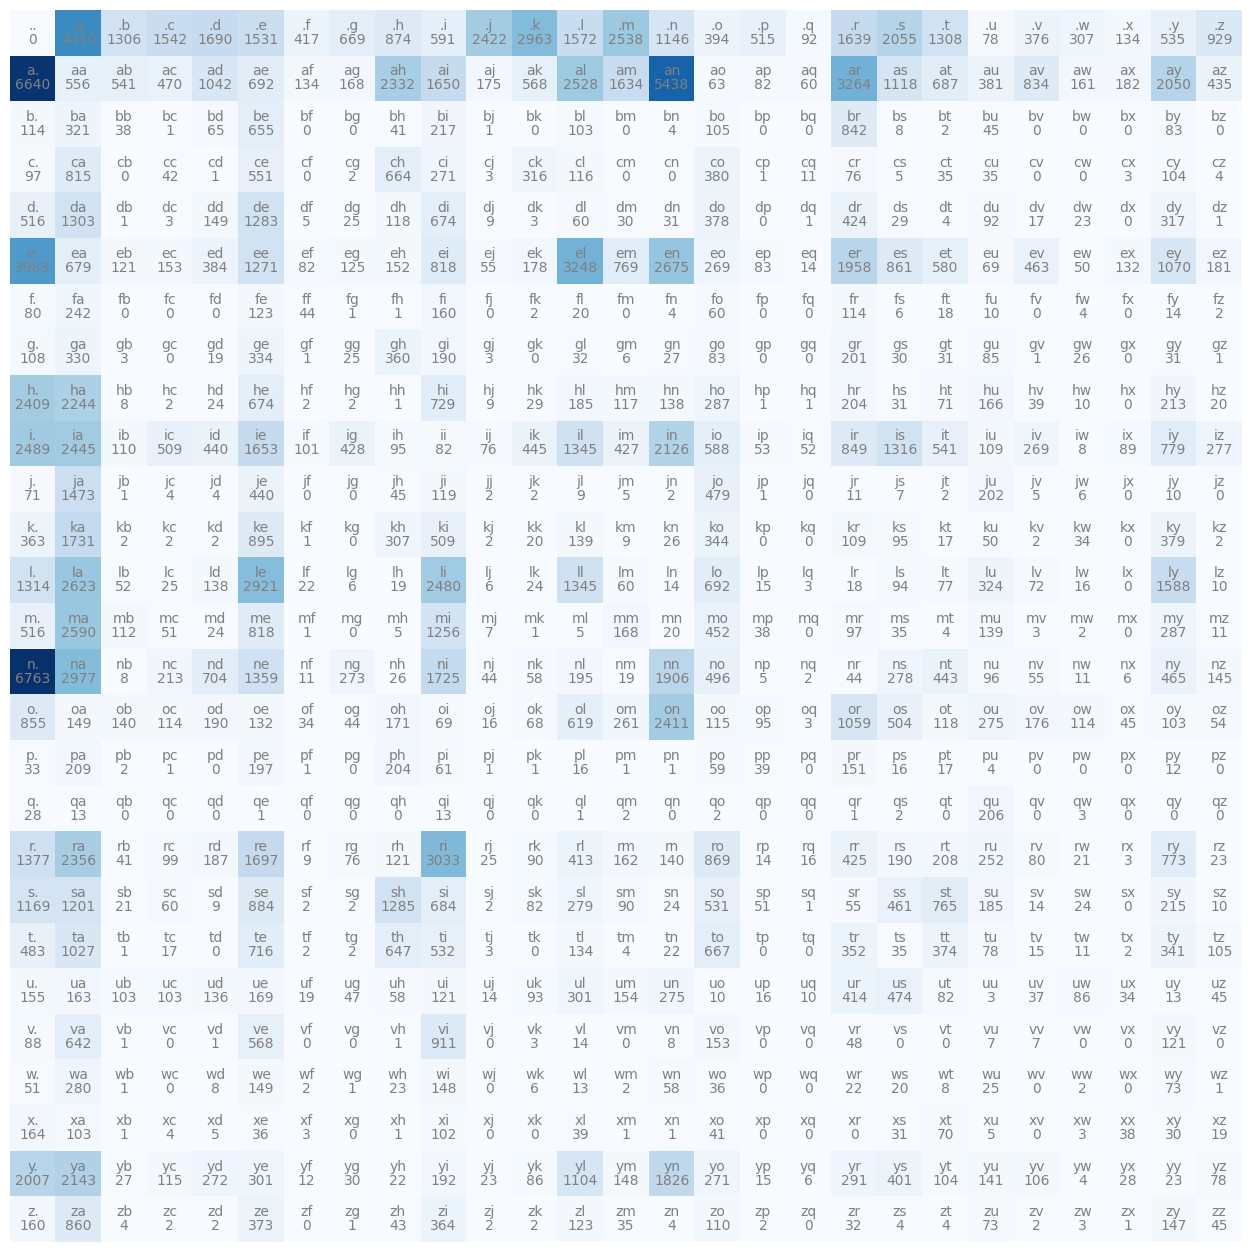

In [74]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(figsize=(16,16))
plt.imshow(N, cmap ='Blues')
for i in range(27):
    for j in range(27):
        chstr = itos[i] + itos[j]
        plt.text(j, i, chstr, ha = 'center', va = 'bottom', color = 'gray')
        plt.text(j, i, N[i, j].item(), ha = 'center', va = 'top', color = 'gray')
plt.axis('off');


In [337]:
N[0, :]

tensor([    0, 13242,  3918,  4626,  5070,  4602,  1251,  2007,  2622,  1773,
         7268,  8889,  4716,  7614,  3438,  1191,  1551,   276,  4917,  6165,
         3924,   234,  1128,   921,   403,  1605,  2787], dtype=torch.int32)

In [338]:
p = N[0].float()
p = p / p.sum()
p

tensor([0.0000, 0.1377, 0.0408, 0.0481, 0.0527, 0.0479, 0.0130, 0.0209, 0.0273,
        0.0184, 0.0756, 0.0925, 0.0491, 0.0792, 0.0358, 0.0124, 0.0161, 0.0029,
        0.0511, 0.0641, 0.0408, 0.0024, 0.0117, 0.0096, 0.0042, 0.0167, 0.0290])

In [339]:
g = torch.Generator().manual_seed(2147483647)
ix = torch.multinomial(p, num_samples=1, replacement=True, generator=g).item()
itos[ix]

'j'

In [340]:
g = torch.Generator().manual_seed(2147483647)
p = torch.rand(3, generator=g)
p = p / p.sum()
p

tensor([0.6064, 0.3033, 0.0903])

In [341]:
g = torch.Generator().manual_seed(2147483647)
torch.multinomial(p, num_samples= 1, replacement=True, generator=g)

tensor([0])

In [342]:
P = (N+1).float()
P /= P.sum(1, keepdim=True)

In [343]:
P[0].sum()

tensor(1.)

In [344]:
g = torch.Generator().manual_seed(2147483647)
for i in range(5):
    ix = 0
    out = []
    while True:
        
        p = P[ix]
        # p = N[ix].float()
        # p = p/p.sum()
        # p = torch.ones(27) / 27.0

        ix = torch.multinomial(p, num_samples=1, replacement=True, generator=g).item() 
        out.append(itos[ix])
        if ix == 0:
            break
    print(''.join(out))

junide.
janasah.
p.
cony.
a.


In [345]:
log_likelyhood = 0.0
n = 0
# for w in words:
for w in ["pruthviraj"]:
    chs = ['.'] + list(w) + ['.']
    for ch1, ch2 in zip(chs, chs[1:]):
        ix1 = stoi[ch1]
        ix2 = stoi[ch2]
        N[ix1, ix2] += 1
        prob = P[ix1, ix2]
        logprob = torch.log(prob)
        log_likelyhood += logprob
        n+=1
        print(f"{ch1}{ch2}: {prob:.4f} {logprob:.4f}")

print(f"{log_likelyhood=}")
nll = -log_likelyhood
print(f"{nll=}")
print(f"{nll/n=}")

.p: 0.0161 -4.1265
pr: 0.1479 -1.9115
ru: 0.0200 -3.9118
ut: 0.0268 -3.6191
th: 0.1163 -2.1512
hv: 0.0054 -5.2178
vi: 0.3538 -1.0390
ir: 0.0480 -3.0355
ra: 0.1855 -1.6847
aj: 0.0052 -5.2534
j.: 0.0253 -3.6773
log_likelyhood=tensor(-35.6279)
nll=tensor(35.6279)
nll/n=tensor(3.2389)


In [346]:
# Create the training set for all bigrams

xs, ys = [], []

for w in words[:1]:
    chs = ['.'] + list(w) + ['.']
    for ch1, ch2 in zip(chs, chs[1:]):
        ix1 = stoi[ch1]
        ix2 = stoi[ch2]
        print(ch1, ch2)
        xs.append(ix1)
        ys.append(ix2)

xs = torch.tensor(xs)
ys = torch.tensor(ys)

. e
e m
m m
m a
a .


In [347]:
import torch.nn.functional as F

In [355]:
xs

tensor([ 0,  5, 13, 13,  1])

In [356]:
ys

tensor([ 5, 13, 13,  1,  0])

In [357]:
xenc = F.one_hot(xs, num_classes=27).float()
logits = xenc @ W #log counts
counts = logits.exp() #equivalent to N
probs = counts / counts.sum(1, keepdim=True)

In [358]:
nlls = torch.zeros(5)

for i in range(5):
    x = xs[i].item()
    y = ys[i].item()
    p = probs[i, y]
    logp = torch.log(p)
    nll = -logp
    nlls[i] = nll

print(f"{nlls.mean().item() = }")


nlls.mean().item() = 3.7693049907684326


In [359]:
#Randomly initialize 27 nurons' weights 
g = torch.Generator().manual_seed(2147483647)
W = torch.randn((27,27), generator=g, requires_grad=True)

In [368]:
#FWD Pass
xenc = F.one_hot(xs, num_classes=27).float()
logits = xenc @ W #log counts
counts = logits.exp() #equivalent to N
probs = counts / counts.sum(1, keepdim=True)
loss = -(probs[torch.arange(5), ys].log().mean())

In [369]:
print(loss)

tensor(3.7292, grad_fn=<NegBackward0>)


In [366]:
#backward pass
W.grad = None # set to zero
loss.backward()

In [367]:
W.data += -0.1 * W.grad

In [ ]:
# ------ Putting all Togather ------- #

In [373]:
#Create the Dataset
xs, ys = [], []
for w in words:
    chs =  ['.'] + list(w) + ['.']
    for ch1, ch2 in zip(chs, chs[1:]):
        ix1 = stoi[ch1]
        ix2 = stoi[ch2]
        xs.append(ix1)
        ys.append(ix2)

xs = torch.tensor(xs)
ys = torch.tensor(ys)
num = xs.nelement()
print('number of examples: ', num)

#initialize the network
g = torch.Generator().manual_seed(214748647)
w = torch.randn((27, 27), generator=g, requires_grad=True)

number of examples:  228146


In [383]:
#gradient descent
for k in range(100):

    #fwd pass
    xenc = F.one_hot(xs, num_classes=27).float()
    logits = xenc @ W
    counts = logits.exp()
    probs = counts / counts.sum(1, keepdim=True)
    loss = -probs[torch.arange(num), ys].log().mean() + 0.01 * (W**2).mean()
    print(loss.item())

    #backward pass
    W.grad = None
    loss.backward()

    #update 
    W.data += -50 * W.grad

2.483289957046509
2.483250856399536
2.4832146167755127
2.4831807613372803
2.4831490516662598
2.4831178188323975
2.4830877780914307
2.4830594062805176
2.4830315113067627
2.4830048084259033
2.482978582382202
2.4829533100128174
2.482928991317749
2.4829049110412598
2.4828813076019287
2.482858419418335
2.4828362464904785
2.4828147888183594
2.482793092727661
2.4827725887298584
2.4827520847320557
2.4827325344085693
2.4827122688293457
2.4826931953430176
2.4826743602752686
2.4826557636260986
2.482637882232666
2.4826202392578125
2.482602834701538
2.4825854301452637
2.4825685024261475
2.4825518131256104
2.4825353622436523
2.4825191497802734
2.4825031757354736
2.482487678527832
2.4824719429016113
2.482456922531128
2.4824416637420654
2.4824271202087402
2.482412338256836
2.48239803314209
2.482383966445923
2.482369899749756
2.482355833053589
2.48234224319458
2.4823286533355713
2.4823157787323
2.482302188873291
2.4822893142700195
2.482276439666748
2.4822638034820557
2.4822516441345215
2.48223900794982

In [386]:
W.shape

torch.Size([27, 27])

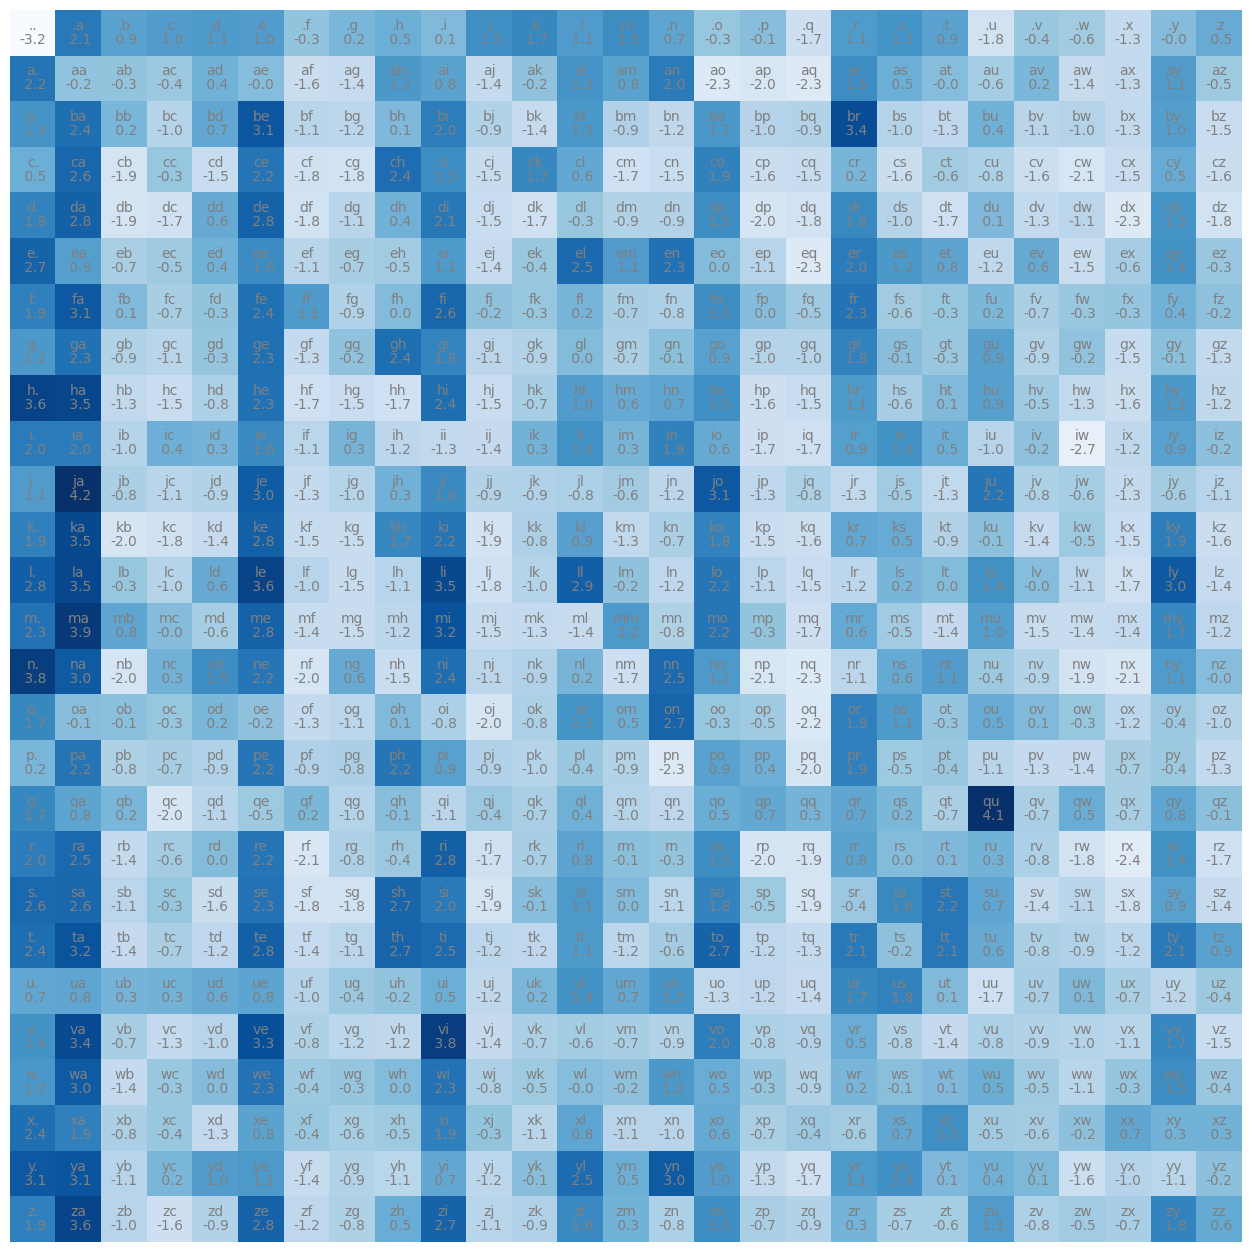

In [384]:
N = W.detach().numpy()
plt.figure(figsize=(16,16))
plt.imshow(N, cmap ='Blues')
for i in range(27):
    for j in range(27):
        chstr = itos[i] + itos[j]
        plt.text(j, i, chstr, ha = 'center', va = 'bottom', color = 'gray')
        plt.text(j, i, f"{N[i, j].item(): .1f}", ha = 'center', va = 'top', color = 'gray')
plt.axis('off');